In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [5]:
df = pd.read_csv("C:\\Users\\nibin\\OneDrive\\Desktop\\loan.csv")

In [6]:
dt = df.copy()

In [7]:
dt.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
dt.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [9]:
dt.shape

(4269, 13)

In [10]:
dt.columns

Index([' loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    loan_id                   4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Checking the null values

In [12]:
dt.isnull().sum()

 loan_id                     0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# Statistical Description of the dataset

In [13]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [14]:
dt.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Formatting the columns

In [15]:
dt.rename(columns=lambda x:x.strip(), inplace=True)
print(dt.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


# EDA and Data Visualisation

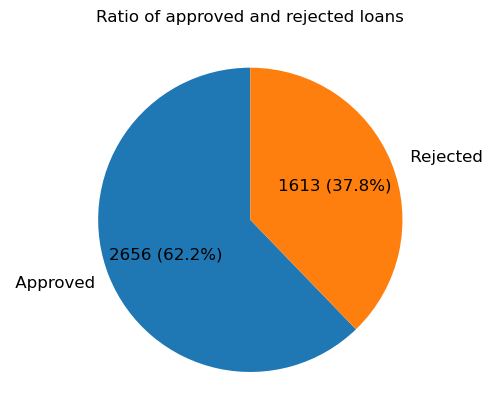

In [16]:
dt['loan_status'].value_counts().plot.pie(
    autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * len(dt) / 100, p), 
    figsize=(5,5), 
    startangle=90, 
    ylabel='',
    title='Ratio of approved and rejected loans',
    textprops={'fontsize': 12}
)
plt.tight_layout()
plt.show()

The count of approved loans is more than the rejected loans with a share of 62%

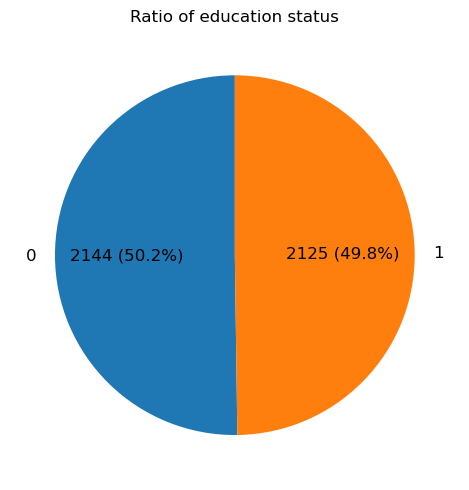

In [56]:
dt['education'].value_counts().plot.pie(
    autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * len(dt) / 100, p), 
    figsize=(5,5), 
    startangle=90, 
    ylabel='',
    title='Ratio of education status',
    textprops={'fontsize': 12}
)
plt.tight_layout()
plt.show()

'0' indicates Graduate counts and '1' Not Graduate

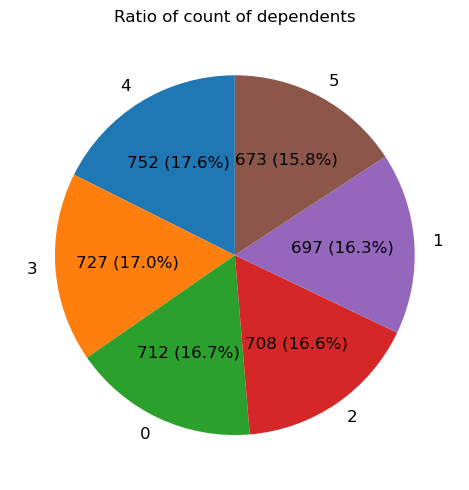

In [57]:
dt['no_of_dependents'].value_counts().plot.pie(
    autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * len(dt) / 100, p), 
    figsize=(5,5), 
    startangle=90, 
    ylabel='',
    title='Ratio of count of dependents',
    textprops={'fontsize': 12}
)
plt.tight_layout()
plt.show()

All the no.of dependents almost have similar share in the data

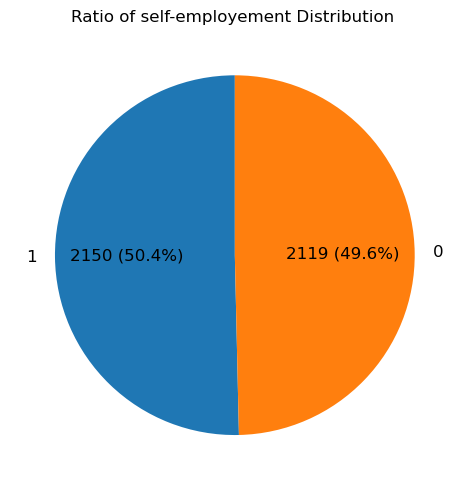

In [58]:
dt['self_employed'].value_counts().plot.pie(
    autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * len(dt) / 100, p), 
    figsize=(5,5), 
    startangle=90, 
    ylabel='',
    title='Ratio of self-employement Distribution ',
    textprops={'fontsize': 12}
)
plt.tight_layout()
plt.show()

'0' indicates not self-employed and '1' self-employed

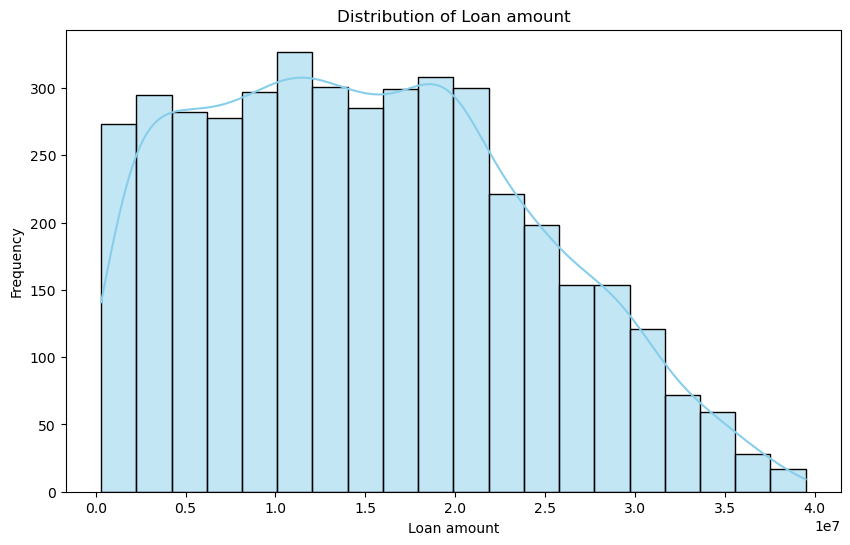

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(dt['loan_amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Loan amount')
plt.xlabel('Loan amount')
plt.ylabel('Frequency')
plt.show()

The loan amount data is unsymmetrically distributed 

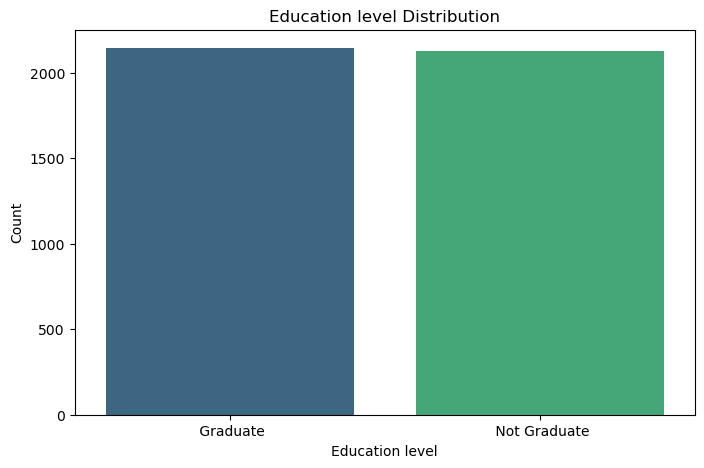

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='education', data=dt, palette='viridis')
plt.title('Education level Distribution')
plt.xlabel('Education level')
plt.ylabel('Count')
plt.show()

The count Graduate and Not Graduate is almost similar in the data

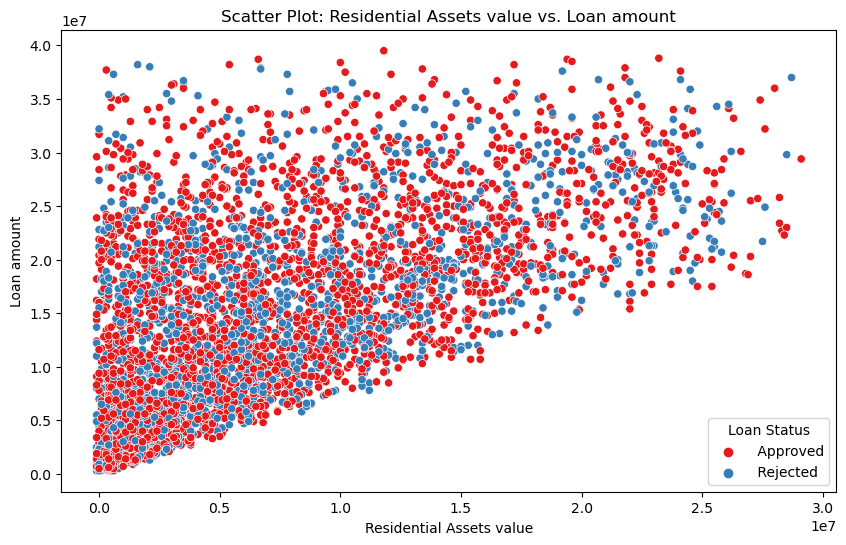

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='residential_assets_value',y='loan_amount', data=dt, hue='loan_status', palette='Set1')
plt.title('Scatter Plot: Residential Assets value vs. Loan amount')
plt.xlabel('Residential Assets value')
plt.ylabel('Loan amount')
plt.legend(title='Loan Status')
plt.show()

There is a little positive correlation between Residential Assets Value and Loan Amount

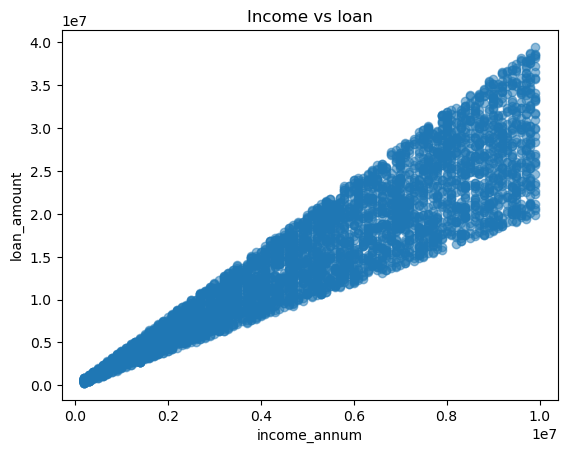

In [21]:
plt.scatter(dt['income_annum'],dt['loan_amount'],alpha=0.5)
plt.xlabel('income_annum')
plt.ylabel('loan_amount')
plt.title('Income vs loan')
plt.show()

C:\Users\nibin\AppData\Local\Temp\ipykernel_16224\2898192236.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt, shade=True, color='orange')


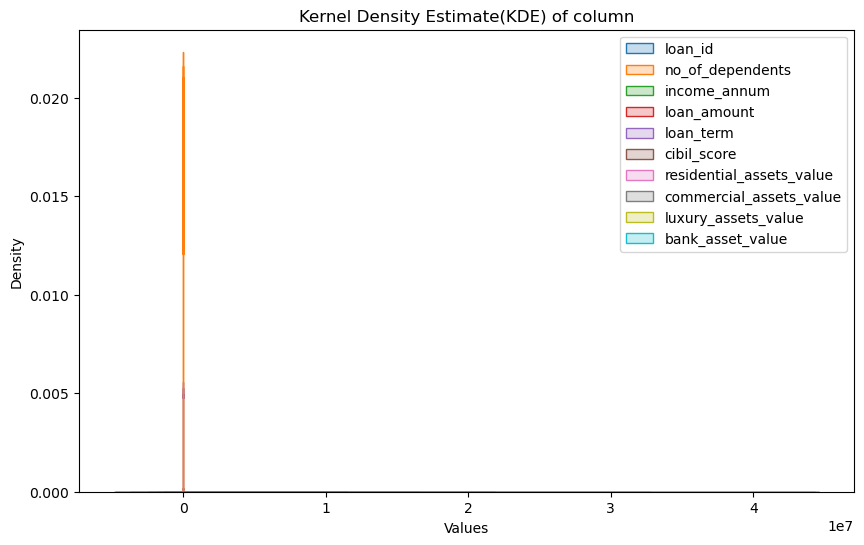

In [22]:
plt.figure(figsize=(10,6))
sns.kdeplot(dt, shade=True, color='orange')
plt.title('Kernel Density Estimate(KDE) of column')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

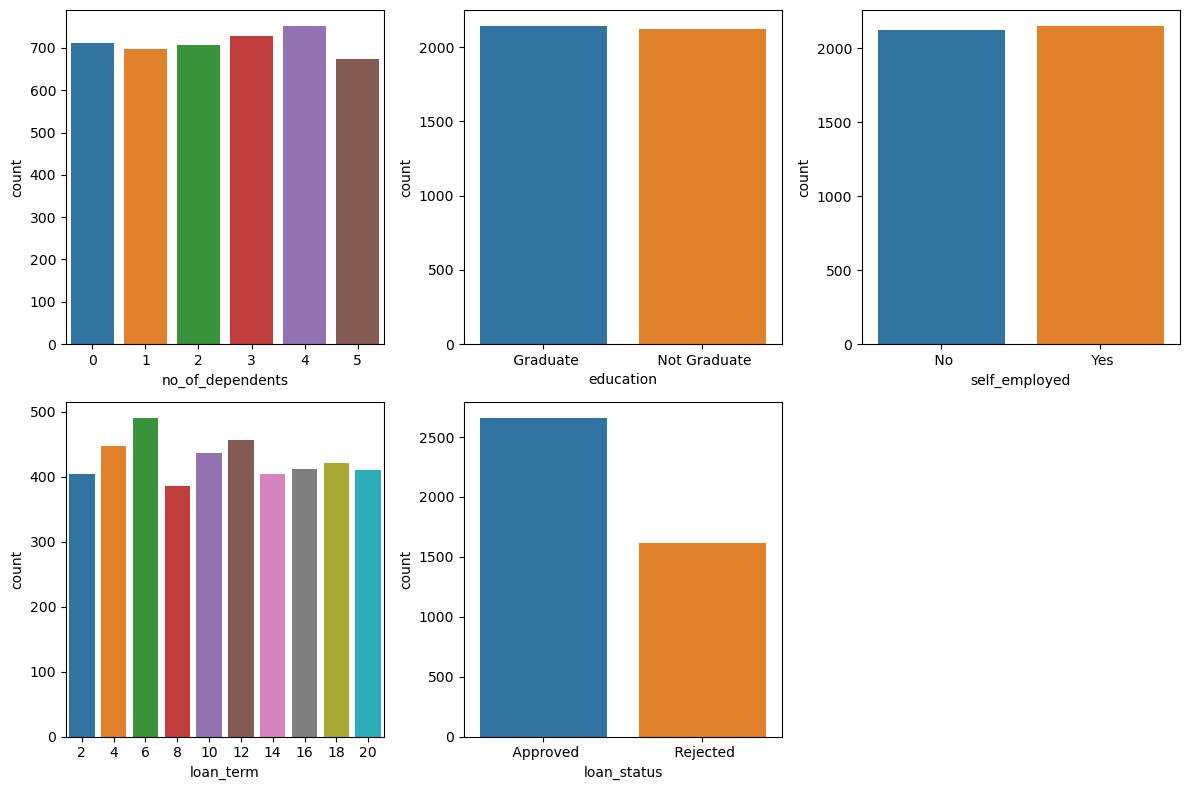

In [23]:
cat_value = ['no_of_dependents', 'education', 'self_employed', 'loan_term', 'loan_status']

plt.figure(figsize=(12,8))
for i in enumerate(cat_value):
    plt.subplot(2,3,i[0]+1)
    sns.countplot(x=i[1], data=dt)
plt.tight_layout()

The maximum count of dependants is 4 and loan term granted is 6 years

# Correlation of Features

C:\Users\nibin\AppData\Local\Temp\ipykernel_16224\3191558602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dt.corr()


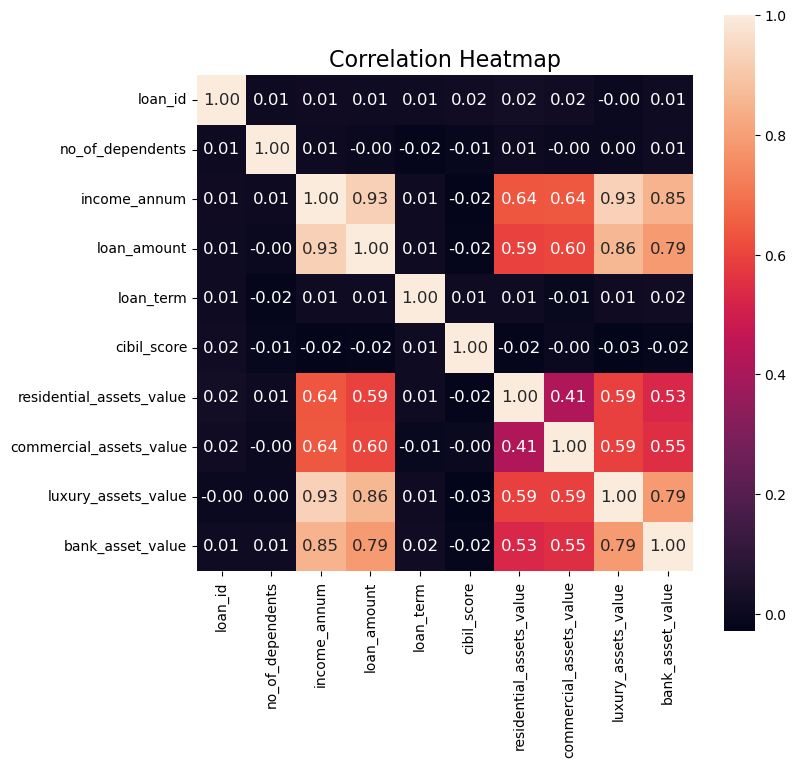

In [24]:
correlation_matrix = dt.corr()
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlation_matrix,square=True, ax=ax, annot=True,fmt='.2f', annot_kws={'size':12})
plt.title('Correlation Heatmap', size=16)
plt.show()

# Feature scaling and Transformation

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dt['education'] = label_encoder.fit_transform(dt['education'])

dt['self_employed'] = label_encoder.fit_transform(dt['self_employed'])

dt['loan_status'] = label_encoder.fit_transform(dt['loan_status'])

Type casting the categorical columns to numerical for the model preparation  

In [26]:
print(dt[['education', 'self_employed', 'loan_status']])

      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


In [27]:
dt

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [28]:
dt.dtypes

loan_id                     int64
no_of_dependents            int64
education                   int32
self_employed               int32
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int32
dtype: object

# Data splitting and Model Building

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x = dt.drop(columns=['loan_status'])
y = dt['loan_status']

numerical_columns = ['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term',
                     'cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value',
                    'bank_asset_value']

x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [30]:
print("Scaled Feature Variables (x):")
print(x.head())


print("\n Target Variable(y):")
print(y.head())

Scaled Feature Variables (x):
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1         -0.294102  -0.995559      -1.007288      1.617979   
1        2         -1.473548   1.004461       0.992765     -0.341750   
2        3          0.295621  -0.995559      -1.007288      1.439822   
3        4          0.295621  -0.995559      -1.007288      1.119139   
4        5          1.475067   1.004461       0.992765      1.689242   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     1.633052   0.192617     1.032792                 -0.780058   
1    -0.324414  -0.508091    -1.061051                 -0.733924   
2     1.610933   1.594031    -0.544840                 -0.057300   
3     1.721525  -0.508091    -0.771045                  1.649637   
4     1.002681   1.594031    -1.264055                  0.757724   

   commercial_assets_value  luxury_assets_value  bank_asset_value  
0                 2.877289             0.832028          0.9

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score,f1_score, accuracy_score, confusion_matrix

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22, stratify=y)

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(x_train, y_train)

C:\Users\nibin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

C:\Users\nibin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


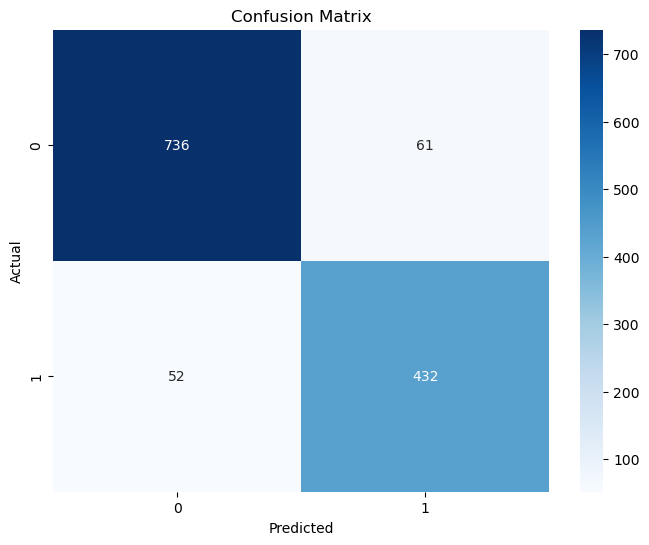

Accuracy: 0.9117876658860266
Precision: 0.912193350221897
Recall: 0.9117876658860266
F1 Score: 0.9119435211864122
Classification Report:
 <function classification_report at 0x0000026A69A37640>


In [35]:
# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=22)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_predict = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_report)

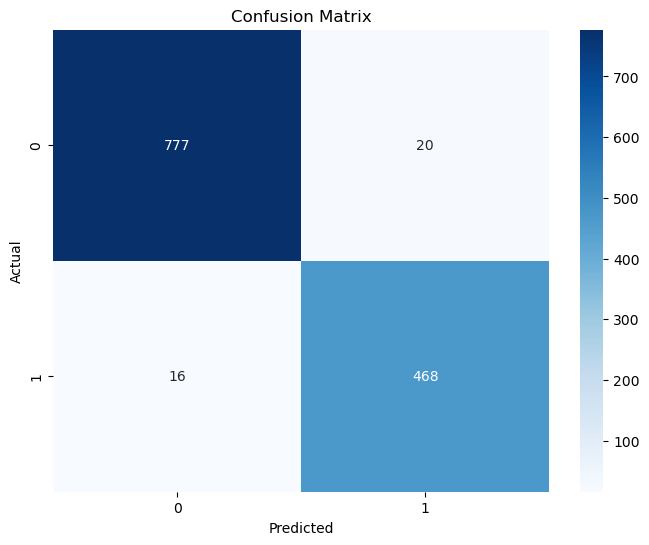

Decision Tree Classifier Metrics:
Accuracy: 0.9718969555035128
Precision: 0.9719619268127734
Recall: 0.9718969555035128
F1 Score: 0.9719194309564452
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       797
           1       0.96      0.97      0.96       484

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281



In [36]:
# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=22)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_predict = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_report = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_report)

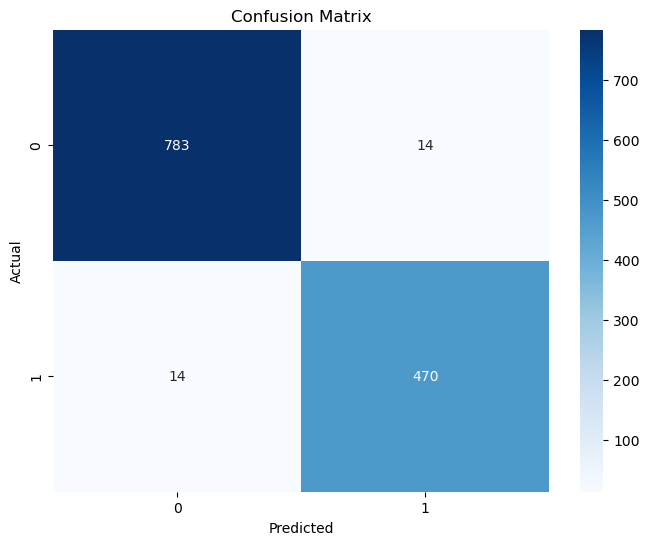

Random Forest Classifier Metrics:
Accuracy: 0.9781420765027322
Precision: 0.9781420765027322
Recall: 0.9781420765027322
F1 Score: 0.9781420765027322
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       797
           1       0.97      0.97      0.97       484

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=22)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_predict = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_report = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_report)

C:\Users\nibin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nibin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nibin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nibin\anaconda3\lib\site-packages\sklearn\metrics\_classifi

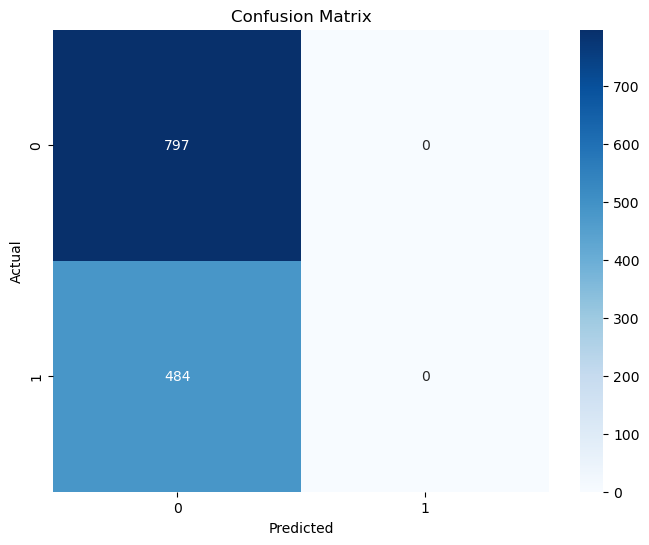

SVM Classifier Metrics:
Accuracy: 0.6221701795472288
Precision: 0.38709573231783084
Recall: 0.6221701795472288
F1 Score: 0.4772566247344959
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       797
           1       0.88      0.89      0.88       484

    accuracy                           0.91      1281
   macro avg       0.91      0.91      0.91      1281
weighted avg       0.91      0.91      0.91      1281



In [38]:
from sklearn.metrics import classification_report

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=22)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_predict = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_report = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

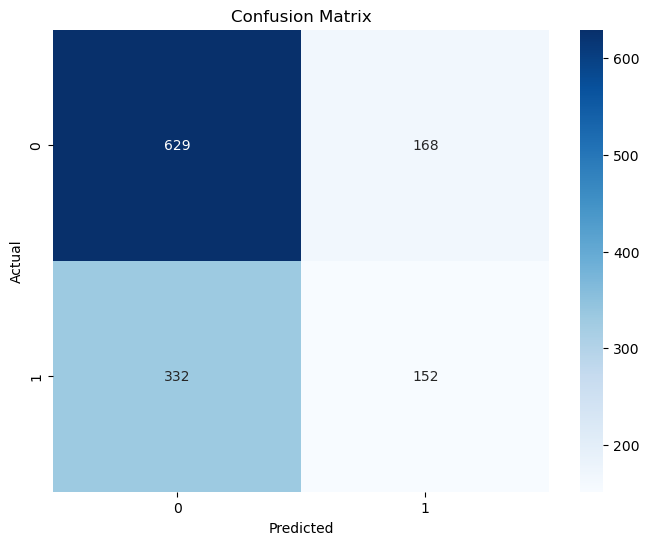

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.60967993754879
Precision: 0.5866960564270401
Recall: 0.60967993754879
F1 Score: 0.5880772302056471
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.72       797
           1       0.47      0.31      0.38       484

    accuracy                           0.61      1281
   macro avg       0.56      0.55      0.55      1281
weighted avg       0.59      0.61      0.59      1281



In [39]:
from sklearn.metrics import classification_report

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_predict = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_report = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_report)

In [40]:
from sklearn.preprocessing import StandardScaler  # PCA --> Principal Component Analysis
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

# Check the mean of the centered data
x_scaled[:,0].mean()

# Import PCA and fit the data to create PCAs
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_scaled)

In [41]:
x_train, x_test, y_train, y_test = \
train_test_split(x_pca, y, test_size = 0.3, random_state = 22, stratify=y)

In [42]:
# Default Random Forest Object
rfc2 = RandomForestClassifier(random_state=22)
rfc2.fit(x_train, y_train)
y_predict2 = rfc2.predict(x_test)

# Score and Evaluate the model using transformed data
conf_matrix = confusion_matrix(y_test, y_predict2)
accuracy = rfc2.score(x_test, y_test)

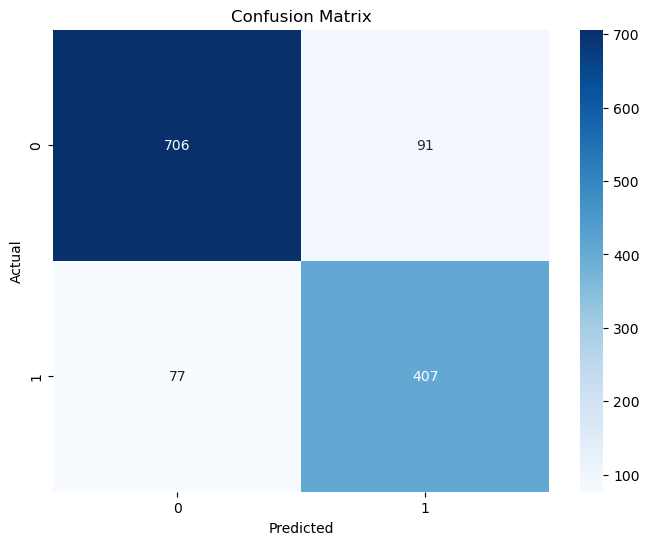

Random Forest Classifier Metrics:
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.72       797
           1       0.47      0.31      0.38       484

    accuracy                           0.61      1281
   macro avg       0.56      0.55      0.55      1281
weighted avg       0.59      0.61      0.59      1281



In [43]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)


# Print the classification report
print("Classification Report:\n", classification_report)

In [44]:
# Classification with all features 
x = dt.drop(columns=['loan_status'])
y = dt['loan_status']

numerical_columns = ['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term',
                     'cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value',
                    'bank_asset_value']

x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22, stratify=y)

In [46]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [47]:
lr.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_predict = lr.predict(x_test)

y_validate = lr.predict(x_train)

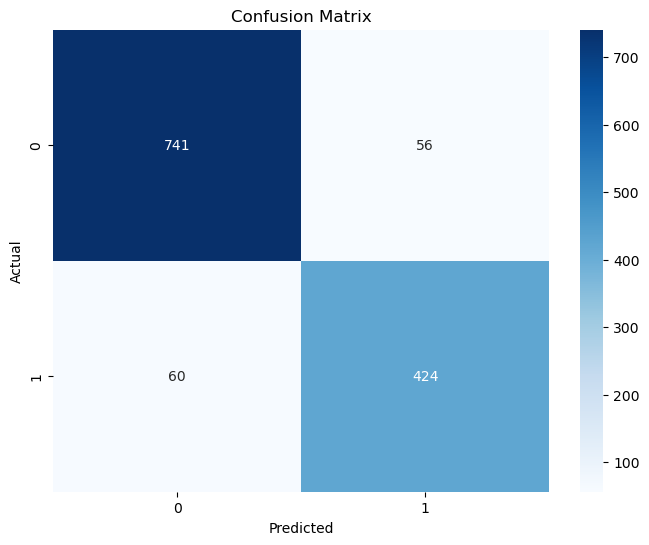

Accuracy: 0.8688524590163934
Precision: 0.9093153464492569
Recall: 0.9094457455113193
F1 Score: 0.9093712081002585


In [49]:
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')


# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [50]:
# Loan status prediction using SVM after normalizing train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22, stratify=y)

In [51]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

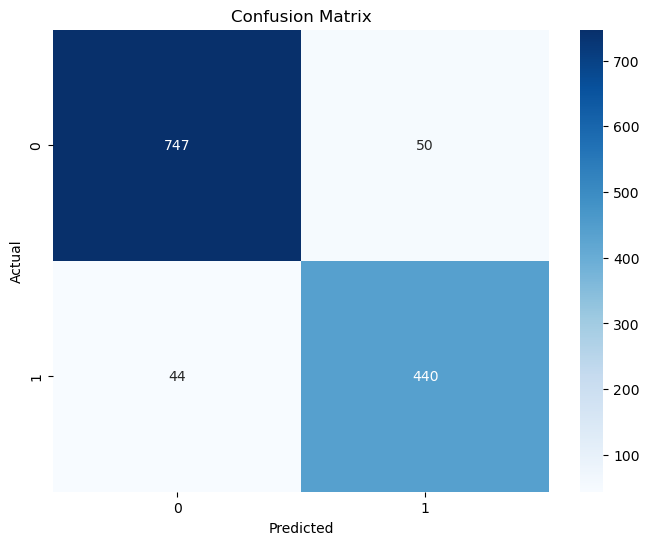

SVM Classifier Metrics:
Accuracy: 0.9266198282591726
Precision: 0.9268372288502146
Recall: 0.9266198282591726
F1 Score: 0.9267072176867754
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       797
           1       0.88      0.89      0.88       484

    accuracy                           0.91      1281
   macro avg       0.91      0.91      0.91      1281
weighted avg       0.91      0.91      0.91      1281



In [52]:
from sklearn.metrics import classification_report

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_predict = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_report = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [53]:
# Loan prediction status using Random forest classifier after normalising train and test data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

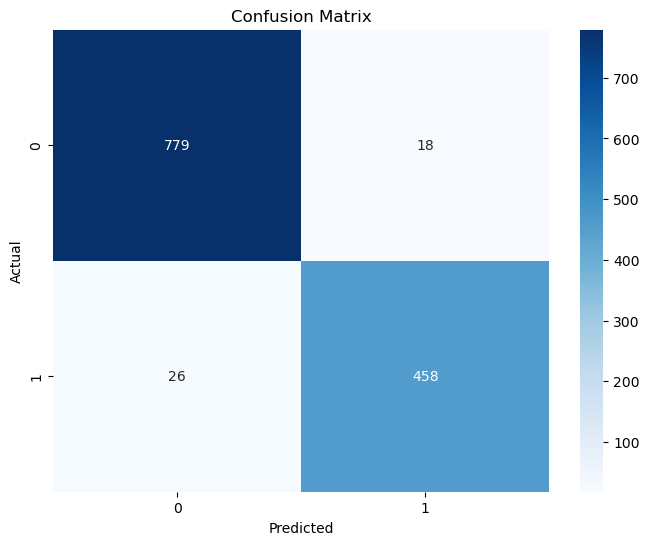

Random Forest Classifier Metrics:
Accuracy: 0.9656518345042935
Precision: 0.9656173802379113
Recall: 0.9656518345042935
F1 Score: 0.9655944803577885
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       797
           1       0.96      0.95      0.95       484

    accuracy                           0.97      1281
   macro avg       0.96      0.96      0.96      1281
weighted avg       0.97      0.97      0.97      1281



In [54]:
from sklearn.metrics import classification_report

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_predict = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_report = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_report)

# Analysis and Conclusion

In Classification model we have implemented various types of ML Algorithm and their accuracy are as follows:
Random Forest Classifier        : 97 %, 
 Decision tree Classifier       : 97 %,
 Logistic Regression            : 91 %,
 Support Vector Classification  : 62 %,
 Kneighbors Classifier          : 60 %

Random Forest Classifier is the best model for predicting the loan approval system with having less False Negative and False Positive metrics ideal for model selection.

Parameter like Cibil score, Annual Income, Lifestyle, career and the assets are the deciding factors in getting the loan approved.

The increase in Annual income significantly helps in increase of loan amount and loan approval to be granted.  

# Future Scope

The model can be more improved by experimenting with various different Classification algorithm and comparing to find the best favourable model.

Collecting features and records which are unbiased and eliminating the biasness of the model.

Domain knowledge of the sector can be an additional advantage in developing the project and determining the accurate model.